# Toric Code Decoder Results Analysis

This notebook loads and visualizes the averaged results from multiple toric code decoder runs, comparing performance with and without loop corrections.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

# os.chdir("/scratch/gpfs/yz4281/TNBP")

# Set style
plt.style.use('default')

# Figure parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.axisbelow'] = True

In [20]:
def load_processed_data(filename="1_100_pp.npz"):
    """
    Load processed toric code data from NPZ file
    """
    data = np.load(filename)
    
    # Print summary information
    print(f"Loaded data from: {filename}")
    print(f"Date: {data['date']}")
    print(f"ID range: {data['id_range']}")
    print(f"Files processed: {data['num_files_processed']}")
    print(f"Missing files: {data['missing_files'].tolist()}")
    print(f"Unique L values: {np.unique(data['L'])}")
    print(f"p range: {data['p'].min():.6f} to {data['p'].max():.6f}")
    print(f"Number of (L,p) combinations: {len(data['L'])}")
    
    return data

In [22]:
# Load the data
data = load_processed_data("/scratch/gpfs/yz4281/TNBP/1_100_pp.npz")

Loaded data from: /scratch/gpfs/yz4281/TNBP/1_100_pp.npz
Date: 250809
ID range: 1-100
Files processed: 100
Missing files: []
Unique L values: [3 5 7]
p range: 0.000030 to 0.002730
Number of (L,p) combinations: 30


In [23]:
def plot_logical_error_rates(data, save_path=None):
    """
    Plot logical error rates vs physical error rate for different L values
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Get unique L values and create colors
    L_values = np.unique(data['L'])
    colors = plt.cm.Set1(np.linspace(0, 1, len(L_values)))
    
    # Plot with loop corrections
    for i, L in enumerate(L_values):
        mask = data['L'] == L
        p_vals = data['p'][mask]
        logical_avg = data['logical_mean_loops_avg'][mask]
        logical_std = data['logical_mean_loops_std'][mask]
        
        ax1.errorbar(p_vals, logical_avg, yerr=logical_std, 
                    label=f'L = {L}', marker='o', color=colors[i], 
                    capsize=3, capthick=1)
    
    ax1.set_xlabel('Physical error rate p')
    ax1.set_ylabel('Logical error rate')
    ax1.set_title('With Loop Corrections')
    ax1.set_yscale('log')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot without loop corrections
    for i, L in enumerate(L_values):
        mask = data['L'] == L
        p_vals = data['p'][mask]
        logical_avg = data['logical_mean_no_loops_avg'][mask]
        logical_std = data['logical_mean_no_loops_std'][mask]
        
        ax2.errorbar(p_vals, logical_avg, yerr=logical_std, 
                    label=f'L = {L}', marker='s', color=colors[i], 
                    capsize=3, capthick=1)
    
    ax2.set_xlabel('Physical error rate p')
    ax2.set_ylabel('Logical error rate')
    ax2.set_title('Without Loop Corrections')
    ax2.set_yscale('log')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.suptitle('Toric Code Logical Error Rates', fontsize=18)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

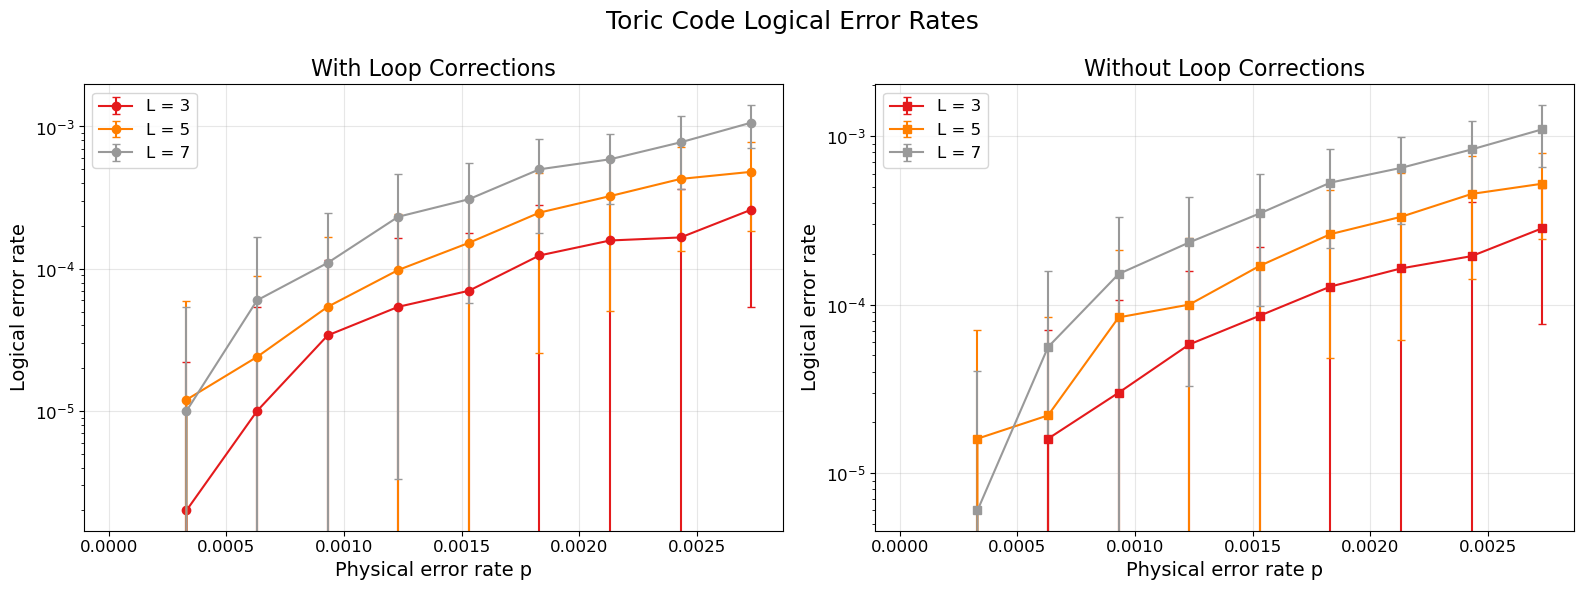

In [24]:
# Plot logical error rates
plot_logical_error_rates(data, save_path="logical_error_rates.png")

In [25]:
def plot_failure_rates(data, save_path=None):
    """
    Plot syndrome failure rates vs physical error rate for different L values
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Get unique L values and create colors
    L_values = np.unique(data['L'])
    colors = plt.cm.Set1(np.linspace(0, 1, len(L_values)))
    
    # Plot with loop corrections
    for i, L in enumerate(L_values):
        mask = data['L'] == L
        p_vals = data['p'][mask]
        failure_avg = data['failure_mean_loops_avg'][mask]
        failure_std = data['failure_mean_loops_std'][mask]
        
        ax1.errorbar(p_vals, failure_avg, yerr=failure_std, 
                    label=f'L = {L}', marker='o', color=colors[i], 
                    capsize=3, capthick=1)
    
    ax1.set_xlabel('Physical error rate p')
    ax1.set_ylabel('Syndrome failure rate')
    ax1.set_title('With Loop Corrections')
    ax1.set_yscale('log')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot without loop corrections
    for i, L in enumerate(L_values):
        mask = data['L'] == L
        p_vals = data['p'][mask]
        failure_avg = data['failure_mean_no_loops_avg'][mask]
        failure_std = data['failure_mean_no_loops_std'][mask]
        
        ax2.errorbar(p_vals, failure_avg, yerr=failure_std, 
                    label=f'L = {L}', marker='s', color=colors[i], 
                    capsize=3, capthick=1)
    
    ax2.set_xlabel('Physical error rate p')
    ax2.set_ylabel('Syndrome failure rate')
    ax2.set_title('Without Loop Corrections')
    ax2.set_yscale('log')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.suptitle('Toric Code Syndrome Failure Rates', fontsize=18)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

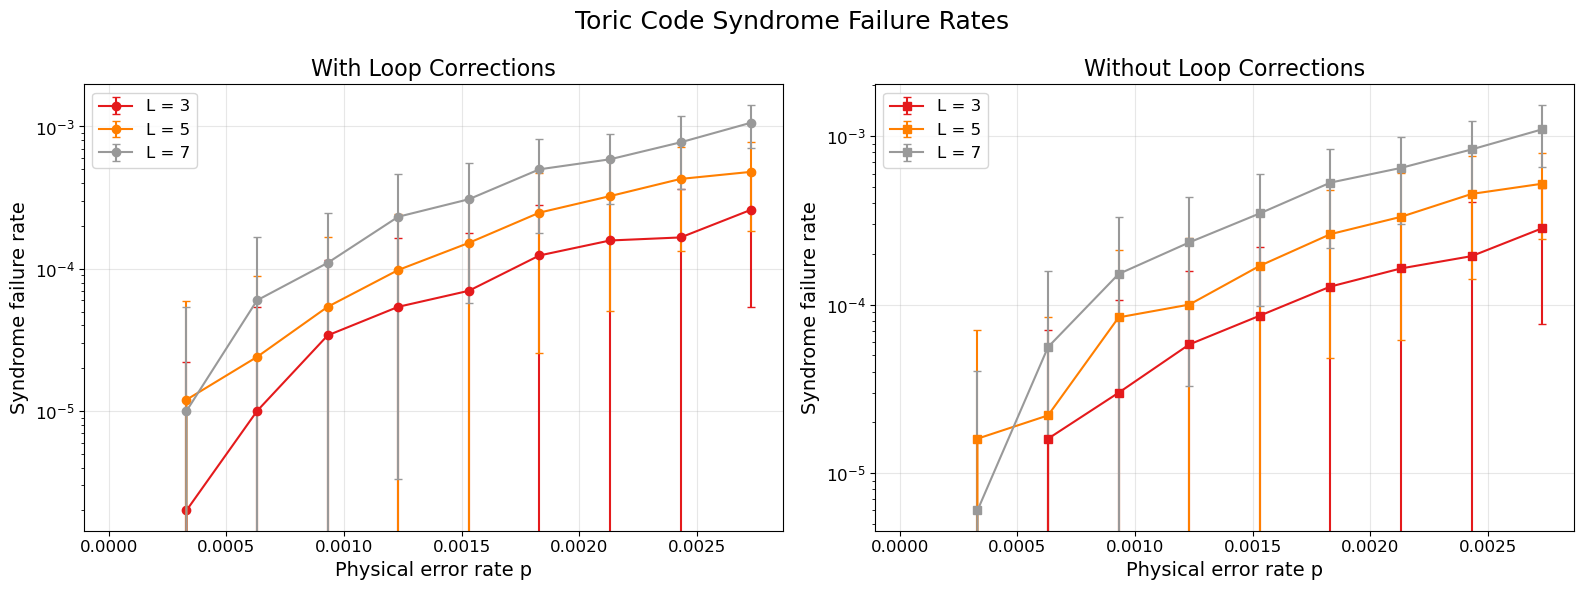

In [26]:
# Plot failure rates
plot_failure_rates(data, save_path="failure_rates.png")

In [27]:
def plot_comparison_by_L(data, save_path=None):
    """
    Direct comparison between loop and no-loop methods for each L value
    """
    L_values = np.unique(data['L'])
    n_L = len(L_values)
    
    fig, axes = plt.subplots(2, n_L, figsize=(5*n_L, 10))
    if n_L == 1:
        axes = axes.reshape(2, 1)
    
    colors = ['#1f77b4', '#ff7f0e']  # Blue for loops, orange for no loops
    
    for i, L in enumerate(L_values):
        mask = data['L'] == L
        p_vals = data['p'][mask]
        
        # Logical error rates comparison
        axes[0, i].errorbar(p_vals, data['logical_mean_loops_avg'][mask], 
                           yerr=data['logical_mean_loops_std'][mask],
                           label='With loops', marker='o', color=colors[0], 
                           capsize=3, capthick=1)
        axes[0, i].errorbar(p_vals, data['logical_mean_no_loops_avg'][mask], 
                           yerr=data['logical_mean_no_loops_std'][mask],
                           label='Without loops', marker='s', color=colors[1], 
                           capsize=3, capthick=1)
        
        axes[0, i].set_xlabel('Physical error rate p')
        axes[0, i].set_ylabel('Logical error rate')
        axes[0, i].set_title(f'L = {L} - Logical Errors')
        axes[0, i].set_yscale('log')
        axes[0, i].grid(True, alpha=0.3)
        axes[0, i].legend()
        
        # Failure rates comparison
        axes[1, i].errorbar(p_vals, data['failure_mean_loops_avg'][mask], 
                           yerr=data['failure_mean_loops_std'][mask],
                           label='With loops', marker='o', color=colors[0], 
                           capsize=3, capthick=1)
        axes[1, i].errorbar(p_vals, data['failure_mean_no_loops_avg'][mask], 
                           yerr=data['failure_mean_no_loops_std'][mask],
                           label='Without loops', marker='s', color=colors[1], 
                           capsize=3, capthick=1)
        
        axes[1, i].set_xlabel('Physical error rate p')
        axes[1, i].set_ylabel('Syndrome failure rate')
        axes[1, i].set_title(f'L = {L} - Syndrome Failures')
        axes[1, i].set_yscale('log')
        axes[1, i].grid(True, alpha=0.3)
        axes[1, i].legend()
    
    plt.suptitle('Loop vs No-Loop Decoder Comparison', fontsize=18)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

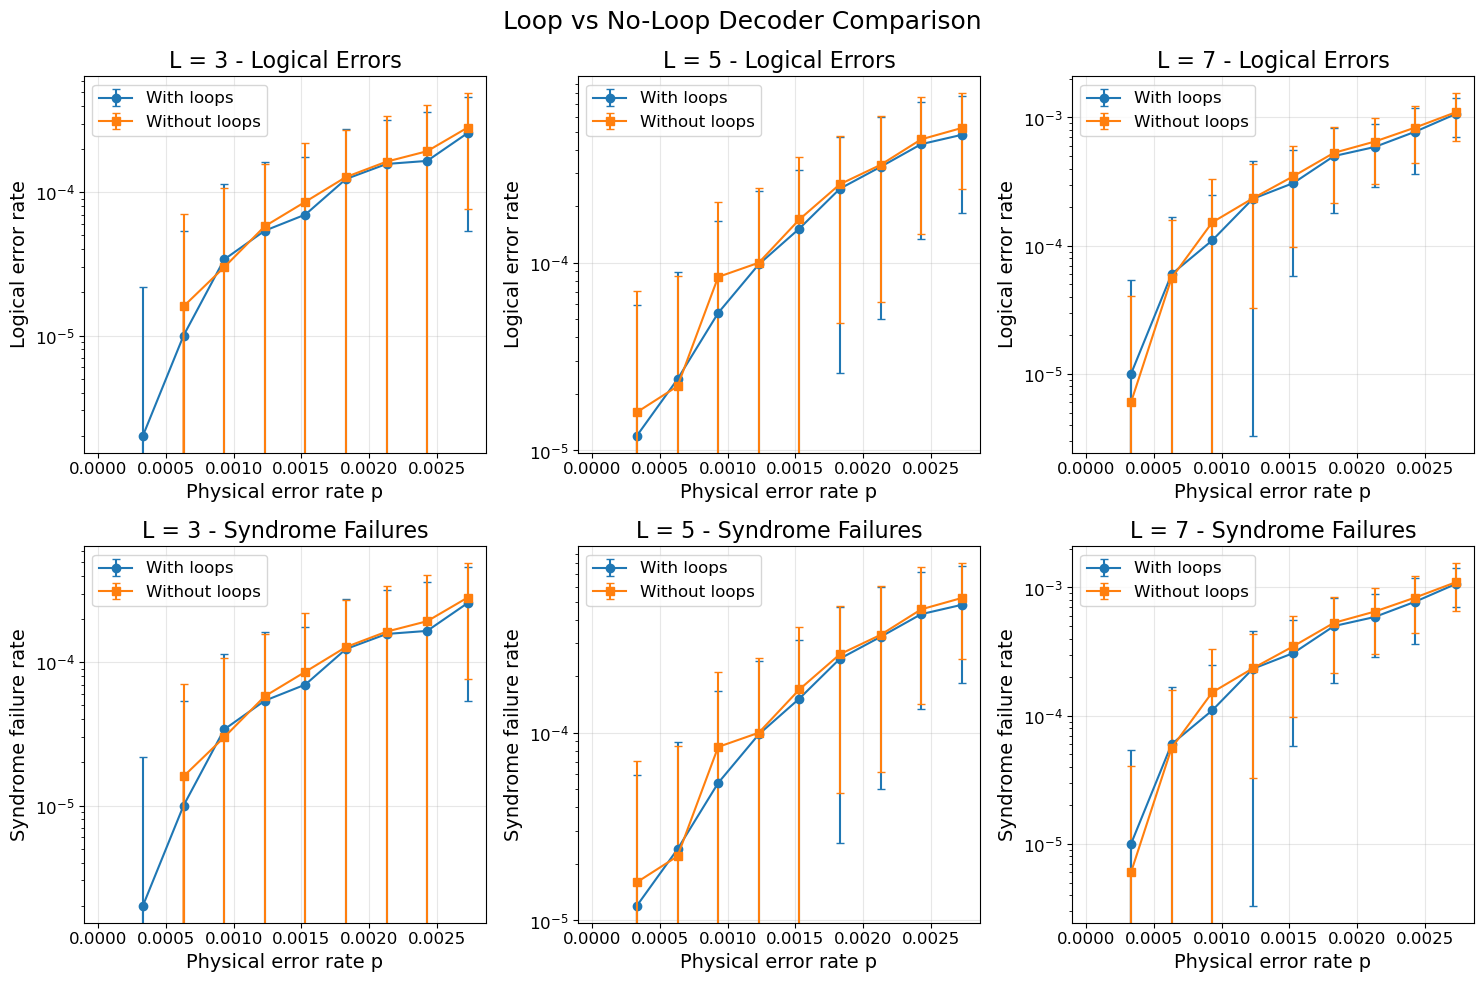

In [28]:
# Plot direct comparisons
plot_comparison_by_L(data, save_path="loop_vs_no_loop_comparison.png")

In [29]:
def plot_improvement_ratio(data, save_path=None):
    """
    Plot the improvement ratio (no_loops / with_loops) to quantify performance gain
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    L_values = np.unique(data['L'])
    colors = plt.cm.Set1(np.linspace(0, 1, len(L_values)))
    
    for i, L in enumerate(L_values):
        mask = data['L'] == L
        p_vals = data['p'][mask]
        
        # Logical error improvement ratio
        logical_loops = data['logical_mean_loops_avg'][mask]
        logical_no_loops = data['logical_mean_no_loops_avg'][mask]
        
        # Avoid division by zero
        ratio_logical = np.where(logical_loops > 0, logical_no_loops / logical_loops, 1)
        
        ax1.plot(p_vals, ratio_logical, label=f'L = {L}', marker='o', color=colors[i])
        
        # Failure rate improvement ratio
        failure_loops = data['failure_mean_loops_avg'][mask]
        failure_no_loops = data['failure_mean_no_loops_avg'][mask]
        
        ratio_failure = np.where(failure_loops > 0, failure_no_loops / failure_loops, 1)
        
        ax2.plot(p_vals, ratio_failure, label=f'L = {L}', marker='s', color=colors[i])
    
    # Add horizontal line at ratio = 1 (no improvement)
    ax1.axhline(y=1, color='black', linestyle='--', alpha=0.5, label='No improvement')
    ax2.axhline(y=1, color='black', linestyle='--', alpha=0.5, label='No improvement')
    
    ax1.set_xlabel('Physical error rate p')
    ax1.set_ylabel('Improvement ratio (no loops / with loops)')
    ax1.set_title('Logical Error Rate Improvement')
    ax1.set_yscale('log')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    ax2.set_xlabel('Physical error rate p')
    ax2.set_ylabel('Improvement ratio (no loops / with loops)')
    ax2.set_title('Syndrome Failure Rate Improvement')
    ax2.set_yscale('log')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.suptitle('Performance Improvement with Loop Corrections\n(Ratio > 1 means loops help)', fontsize=18)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

/tmp/ipykernel_1961313/3058029419.py:19: RuntimeWarning: invalid value encountered in divide
  ratio_logical = np.where(logical_loops > 0, logical_no_loops / logical_loops, 1)
/tmp/ipykernel_1961313/3058029419.py:27: RuntimeWarning: invalid value encountered in divide
  ratio_failure = np.where(failure_loops > 0, failure_no_loops / failure_loops, 1)


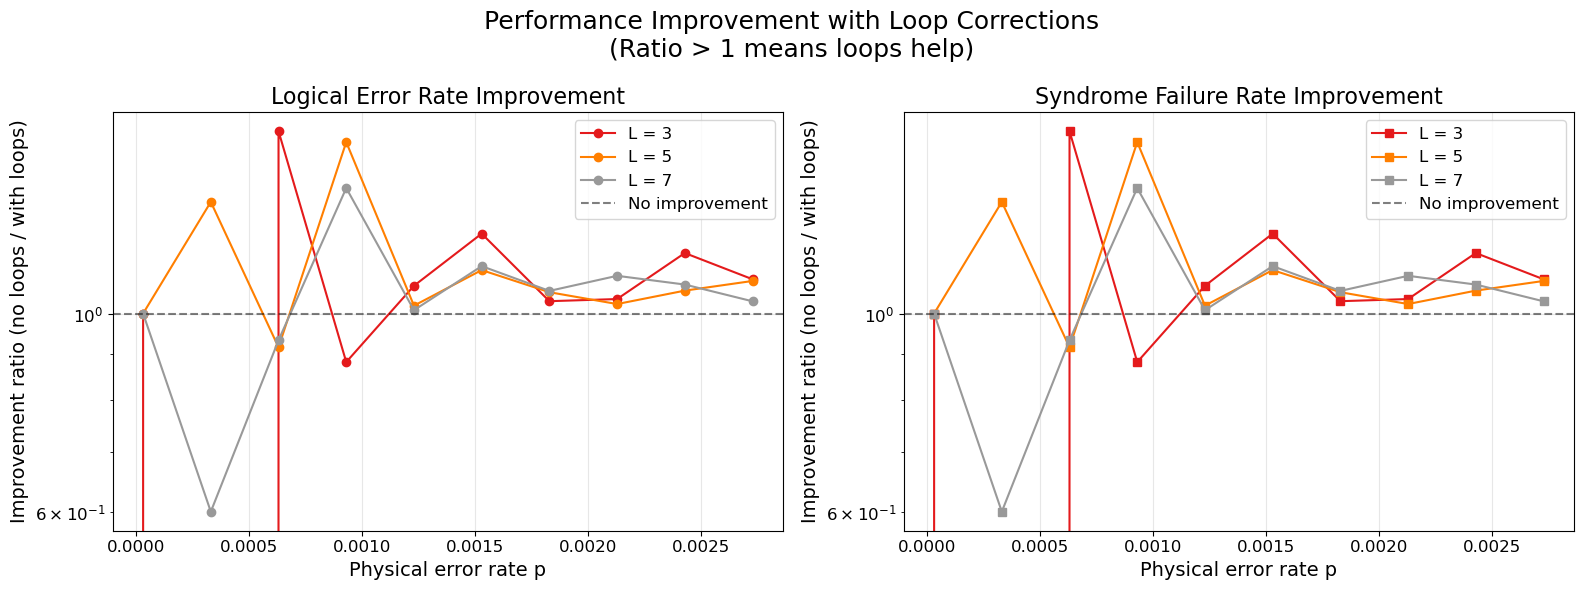

In [30]:
# Plot improvement ratios
plot_improvement_ratio(data, save_path="improvement_ratios.png")

In [31]:
def print_summary_statistics(data):
    """
    Print summary statistics for the dataset
    """
    print("\n" + "="*60)
    print("SUMMARY STATISTICS")
    print("="*60)
    
    L_values = np.unique(data['L'])
    
    for L in L_values:
        mask = data['L'] == L
        print(f"\nL = {L}:")
        print(f"  Number of p values: {np.sum(mask)}")
        print(f"  p range: {data['p'][mask].min():.6f} to {data['p'][mask].max():.6f}")
        
        # Average performance across all p values
        logical_loops_avg = np.mean(data['logical_mean_loops_avg'][mask])
        logical_no_loops_avg = np.mean(data['logical_mean_no_loops_avg'][mask])
        failure_loops_avg = np.mean(data['failure_mean_loops_avg'][mask])
        failure_no_loops_avg = np.mean(data['failure_mean_no_loops_avg'][mask])
        
        print(f"  Average logical error rate (with loops): {logical_loops_avg:.6f}")
        print(f"  Average logical error rate (no loops): {logical_no_loops_avg:.6f}")
        print(f"  Average syndrome failure rate (with loops): {failure_loops_avg:.6f}")
        print(f"  Average syndrome failure rate (no loops): {failure_no_loops_avg:.6f}")
        
        # Improvement factors
        if logical_loops_avg > 0:
            logical_improvement = logical_no_loops_avg / logical_loops_avg
            print(f"  Logical error improvement factor: {logical_improvement:.2f}x")
        
        if failure_loops_avg > 0:
            failure_improvement = failure_no_loops_avg / failure_loops_avg
            print(f"  Syndrome failure improvement factor: {failure_improvement:.2f}x")

In [32]:
# Print summary statistics
print_summary_statistics(data)


SUMMARY STATISTICS

L = 3:
  Number of p values: 10
  p range: 0.000030 to 0.002730
  Average logical error rate (with loops): 0.000088
  Average logical error rate (no loops): 0.000096
  Average syndrome failure rate (with loops): 0.000088
  Average syndrome failure rate (no loops): 0.000096
  Logical error improvement factor: 1.09x
  Syndrome failure improvement factor: 1.09x

L = 5:
  Number of p values: 10
  p range: 0.000030 to 0.002730
  Average logical error rate (with loops): 0.000182
  Average logical error rate (no loops): 0.000196
  Average syndrome failure rate (with loops): 0.000182
  Average syndrome failure rate (no loops): 0.000196
  Logical error improvement factor: 1.08x
  Syndrome failure improvement factor: 1.08x

L = 7:
  Number of p values: 10
  p range: 0.000030 to 0.002730
  Average logical error rate (with loops): 0.000365
  Average logical error rate (no loops): 0.000391
  Average syndrome failure rate (with loops): 0.000365
  Average syndrome failure rate (n

## Data Export

Export key results to CSV for further analysis or publication.

In [33]:
def export_results_to_csv(data, filename="processed_results.csv"):
    """
    Export the processed results to CSV format
    """
    import csv
    
    with open(filename, 'w', newline='') as csvfile:
        fieldnames = ['L', 'p', 'logical_loops_avg', 'logical_loops_std', 
                     'failure_loops_avg', 'failure_loops_std',
                     'logical_no_loops_avg', 'logical_no_loops_std',
                     'failure_no_loops_avg', 'failure_no_loops_std']
        
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        
        for i in range(len(data['L'])):
            writer.writerow({
                'L': data['L'][i],
                'p': data['p'][i],
                'logical_loops_avg': data['logical_mean_loops_avg'][i],
                'logical_loops_std': data['logical_mean_loops_std'][i],
                'failure_loops_avg': data['failure_mean_loops_avg'][i],
                'failure_loops_std': data['failure_mean_loops_std'][i],
                'logical_no_loops_avg': data['logical_mean_no_loops_avg'][i],
                'logical_no_loops_std': data['logical_mean_no_loops_std'][i],
                'failure_no_loops_avg': data['failure_mean_no_loops_avg'][i],
                'failure_no_loops_std': data['failure_mean_no_loops_std'][i]
            })
    
    print(f"Results exported to {filename}")

# Export results
export_results_to_csv(data, "toric_code_averaged_results.csv")

Results exported to toric_code_averaged_results.csv
